<a href="https://colab.research.google.com/github/AmimaShifa/Predictive-Supervised-Machine-Learning-Models-for-Diabetes-Mellitus/blob/main/Predictive_Supervised_Machine_Learning_Model_for_Diabetes_Mellitus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from collections import defaultdict
from collections import Counter

%matplotlib inline

In [ ]:
from google.colab import files #to upload data set
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [12]:
dm= pd.read_csv('diabetes.csv') #loading the data set
dm.head()#printing first 5 rows of data frame



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetescopy = dm.copy(deep = True)
diabetescopy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetescopy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN) 
#replacing NaN values with 0 for certain columns :
diabetescopy['Glucose'].fillna(diabetescopy['Glucose'].mean(), inplace = True)
diabetescopy['BloodPressure'].fillna(diabetescopy['BloodPressure'].mean(), inplace = True)
diabetescopy['SkinThickness'].fillna(diabetescopy['SkinThickness'].median(), inplace = True)
diabetescopy['Insulin'].fillna(diabetescopy['Insulin'].median(), inplace = True)
diabetescopy['BMI'].fillna(diabetescopy['BMI'].median(), inplace = True)
full_data = dm.astype(float).values.tolist() #Converting dataframe into a normal list for further processing
full_data#to print the data set

[[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0, 1.0],
 [1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.35100000000000003, 31.0, 0.0],
 [8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0, 1.0],
 [1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.16699999999999998, 21.0, 0.0],
 [0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.2880000000000003, 33.0, 1.0],
 [5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0, 0.0],
 [3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0, 1.0],
 [10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0, 0.0],
 [2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0, 1.0],
 [8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.23199999999999998, 54.0, 1.0],
 [4.0, 110.0, 92.0, 0.0, 0.0, 37.6, 0.191, 30.0, 0.0],
 [10.0, 168.0, 74.0, 0.0, 0.0, 38.0, 0.537, 34.0, 1.0],
 [10.0, 139.0, 80.0, 0.0, 0.0, 27.1, 1.4409999999999998, 57.0, 0.0],
 [1.0, 189.0, 60.0, 23.0, 846.0, 30.1, 0.39799999999999996, 59.0, 1.0],
 [5.0, 166.0, 72.0, 19.0, 175.0, 25.8, 0.5870000000000001, 51.0, 1.0],
 [7.0, 100.0, 0.0, 0.0, 0.0, 30.0, 0.484, 32.0, 1.0],
 [0.0, 118

In [ ]:
print("dimension of diabetes data: {}".format(dm.shape))#This dataset has 9 columns, 9th one seems to be the labels, 1 or 0 for Diabetes or no Diabetes.
print(dm.groupby('Outcome').size())#Outcome here means the prediction that is to be done, that is how many people in data set have diabetes and how many do not.   

dimension of diabetes data: (768, 9)
Outcome
0    500
1    268
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


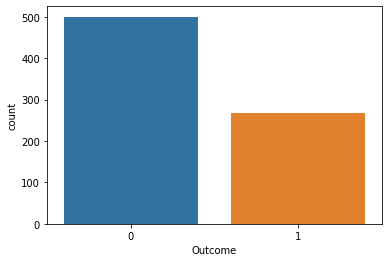

In [ ]:
#plotting the above data as bar graph for better visualization
import seaborn as sns
sns.countplot(dm['Outcome'],label="Count")

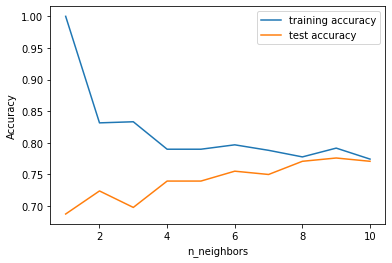

In [10]:
#TRAIN-TEST-SPLIT
X_train, X_test, y_train, y_test = train_test_split(dm.loc[:, dm.columns != 'Outcome'], dm['Outcome'], stratify=dm['Outcome'], random_state=66)
training_accuracy = []
test_accuracy = []
#trying n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    #building the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    #record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    #record testing set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
#plotting  the training and test set accuracy on the y-axis against the setting of n_neighbors
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [13]:
#As per observation from plot the testing and training accuracy are more close to each other that is the model that has the best performance is for when k=9 
#Calculating Accuracy for both training and test case for when k=9
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.78
